# Implement de l'algorithme de la descente de Gradient en Deep Learning

## Importation des packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
plt.style.use('ggplot')

## Création du dataset

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print(f'Les de X: {X.shape}')
print(f'Les de y: {y.shape}')

Les de X: (100, 2)
Les de y: (100, 1)


## Répresentation graphique des données

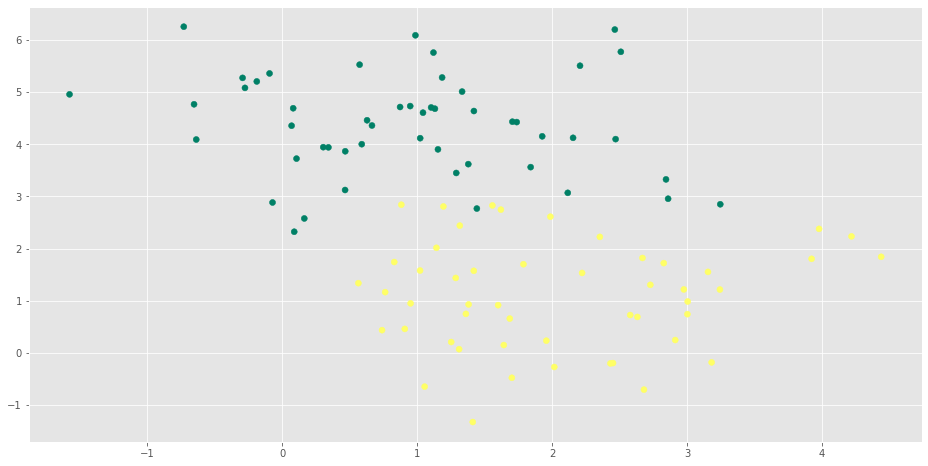

In [3]:
plt.figure(figsize=(16, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')

## Création de la fonction initialisation

In [4]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    
    return (W, b)

## Testons la fonction d'initialisation

In [5]:
W, b = initialisation(X)

In [6]:
W

array([[ 1.6442544 ],
       [-0.37450607]])

In [7]:
b

array([-0.11659903])

## Création de la fonction d'action

In [8]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

## Création du modèle

In [9]:
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    
    return A

## Testons le  modèle

In [10]:
A = modele(X, W,b)

In [12]:
A.shape

(100, 1)

## Determinons la fonction coût

In [15]:
def fonction_cout(A, y):
    L = 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
    
    return L

## Testons la fonction coût

In [16]:
Loss = fonction_cout(A, y)

In [17]:
Loss

0.527059734522911

## Determination des gradients

In [23]:
def gradients(X, A, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    
    return (dW, db)

## Testons les Gradients

In [24]:
dW, db = gradients(X, A, y)

In [25]:
dW

array([[0.29865369],
       [0.88878096]])

In [26]:
db

0.17497246350272477

## Algorithme de mise à jour des paramètres W et b

In [27]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    return (W, b)

## Testons l'Algorithme de mise à jour des paramètres W et b

### W, b AVANT MISE A JOUR

In [29]:
W, b

(array([[ 1.6442544 ],
        [-0.37450607]]),
 array([-0.11659903]))

In [30]:
W, b = update(dW, db, W, b, 0.1)

In [31]:
W, b

(array([[ 1.61438903],
        [-0.46338417]]),
 array([-0.13409627]))